In [93]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
gene_exp = read_gct('../data/kras_isogenic_vs_imortalized.gct')

Dropping slices with less than 2 unique values ...
	Dropping 7527 with axis 1: ['MIR1302-11', 'FAM138A', 'OR4F5', 'RP4-669L17.6', 'RP5-857K21.5', 'AC114498.6', 'SAMD11', 'RP11-465B22.5', 'MIR200B', 'RP4-758J18.8', 'AL645728.3', 'RP11-547D24.1', 'RP11-740P5.2', 'ACTRT2', 'RP13-614K11.1', 'RP11-374C13.1', 'RP5-1166F10.1', 'RP1-37J18.1', 'RP11-242F24.1', 'RP11-312B8.2', 'RP3-453P22.2', 'UTS2', 'RP4-633I8.2', 'RP4-633I8.3', 'CA6', 'SLC2A7', 'MIR34A', 'Z98044.1', 'RN5S40', 'AL590639.1', 'RP11-496H15.2', 'RP11-340B24.3', 'RPL39P6', 'RP5-934G17.6', 'RNU5E-4P', 'AL096840.1', 'RP5-888M10.2', 'U6atac', 'AADACL4', 'C1orf158', 'PRAMEF12', 'PRAMEF11', 'PRAMEF2', 'PRAMEF4', 'PRAMEF10', 'RP11-450I1.2', 'PRAMEF6', 'PRAMEF22', 'RP13-221M14.1', 'RP13-221M14.3', 'RP11-248D7.2', 'PRAMEF5', 'RP11-219C24.8', 'RP11-219C24.6', 'PRAMEF9', 'PRAMEF13', 'PRAMEF16', 'PRAMEF21', 'XX-FW84067D5.2', 'PRAMEF15', 'RN5S41', 'SCARNA11', 'RP11-344F13.1', 'RP4-704D23.1', 'C1orf195', 'RP3-467K16.7', 'RP11-5P18.5', 'AL137798.

Computing 0.95 CI ...
	With 2 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 2 permuted targets ...
Making annotations ...
Plotting match panel ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


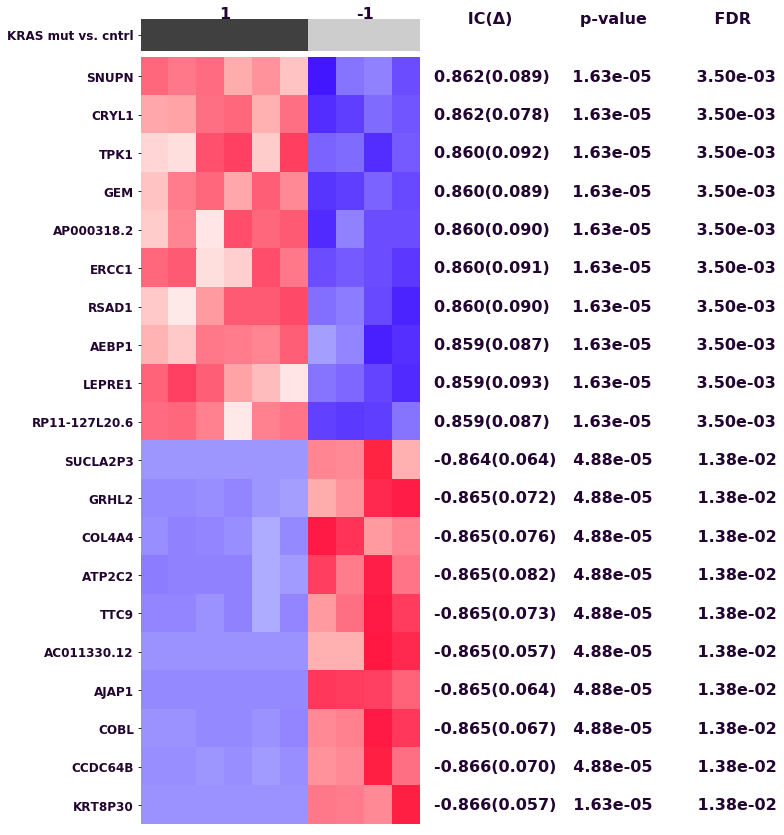

In [46]:
# Find gene scores
# It computes the association between the phenotype and the gene expression profiles as described in the introduction above.
gene_scores = make_match_panel(
    pd.Series(
        [1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
        index=gene_exp.columns,
        name='KRAS mut vs. cntrl'),
    gene_exp,
    target_type='binary',  # Target profile type
    n_permutations=2,  # Number of random permutations
    n_samplings=2,  # Number of random permutations
    n_jobs=24,
    file_path_prefix=
    '../results/2/kras_signature',  # Output files (.txt and .pdf)
    max_n_features=20,  # Max. number of features shown in heatmap
    random_seed=12345)  # Random number generation seed

In [103]:
kras_relevant_genes = get_top_and_bottom_indices(gene_scores, 'Score', 500).tolist()

In [104]:
gene_exp.index.name = 'Gene'
gene_exp.columns.name = 'Cellline'

/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


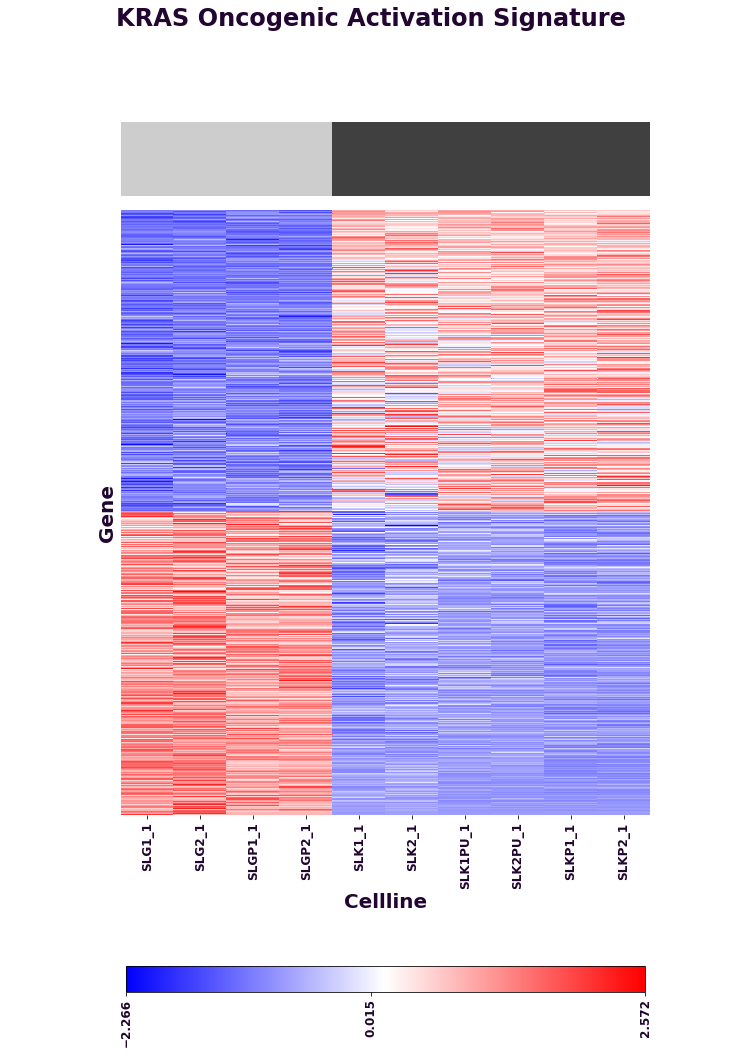

In [105]:
plot_heatmap(
    gene_exp.ix[kras_relevant_genes, :],
    figure_size=(16, 16),
    normalization_axis=1,
    normalization_method='-0-',
    xticklabels=True,
    column_annotation=[1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
    title='KRAS Oncogenic Activation Signature')